# Inspecting and cleaning the dataset

In [1]:
#imporitng the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read the csv file 

df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check the shape

df.shape

(730, 16)

In [4]:
#check the details of numeriacl data

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#check if dataframe have null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Droping instant column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [7]:
#check the dataframe after dropping 
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
#Print number of unique values in all columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [9]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

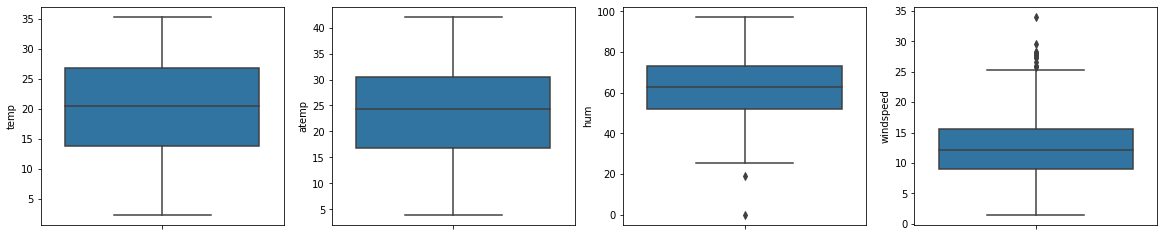

In [10]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

by this we can say that there are no outliers

# EDA

In [11]:
#Convert season and  weathersit to categorical types
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth =df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

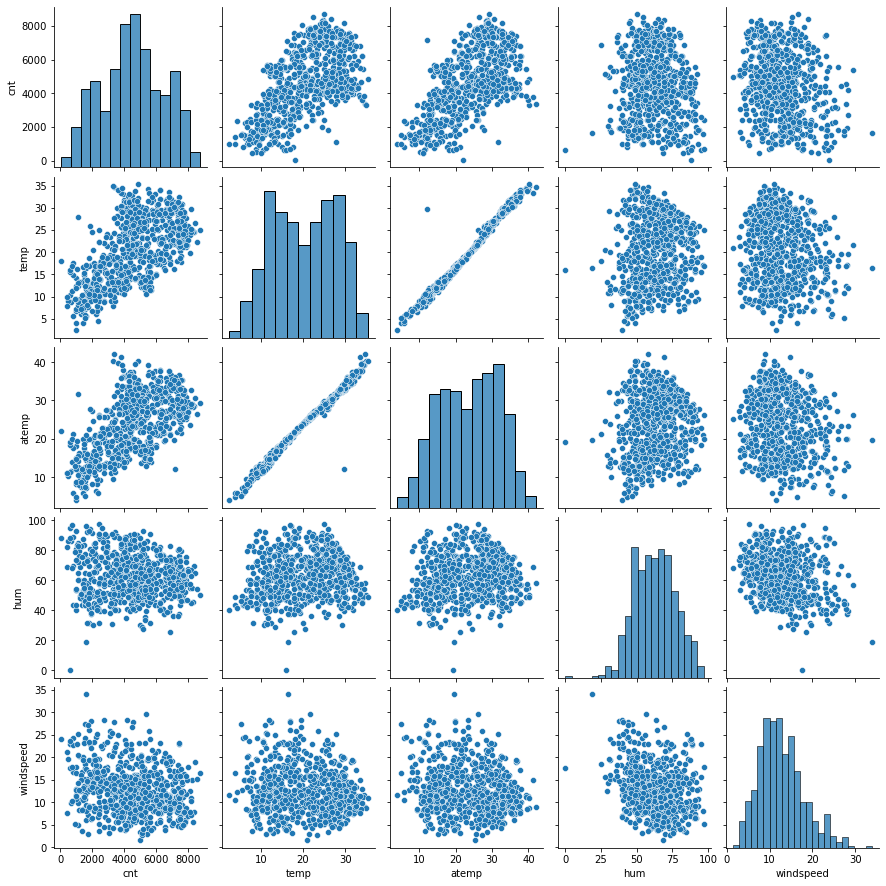

In [13]:
#Draw pairplots for continuous numeric variables
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

here we can conclude that temp and atemp have high correlation, so for building a regression model one of the two variables is enough

And also Target variable have linear correlation with only temp and atemp

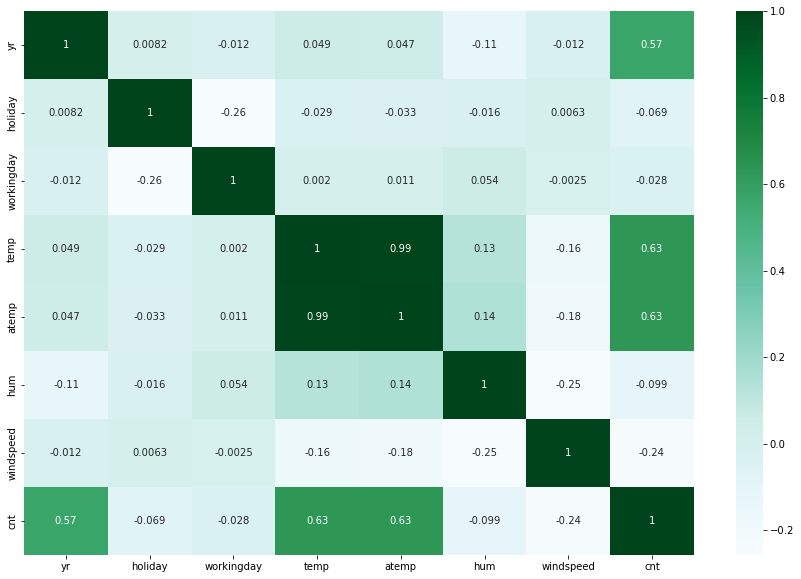

In [14]:
#find correlation coeff between each variable using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='BuGn',annot = True)
plt.show()

we can drop atemp column as atemp has 0.99~1 correlation coeff with temp 

In [15]:
df.drop(['atemp'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600


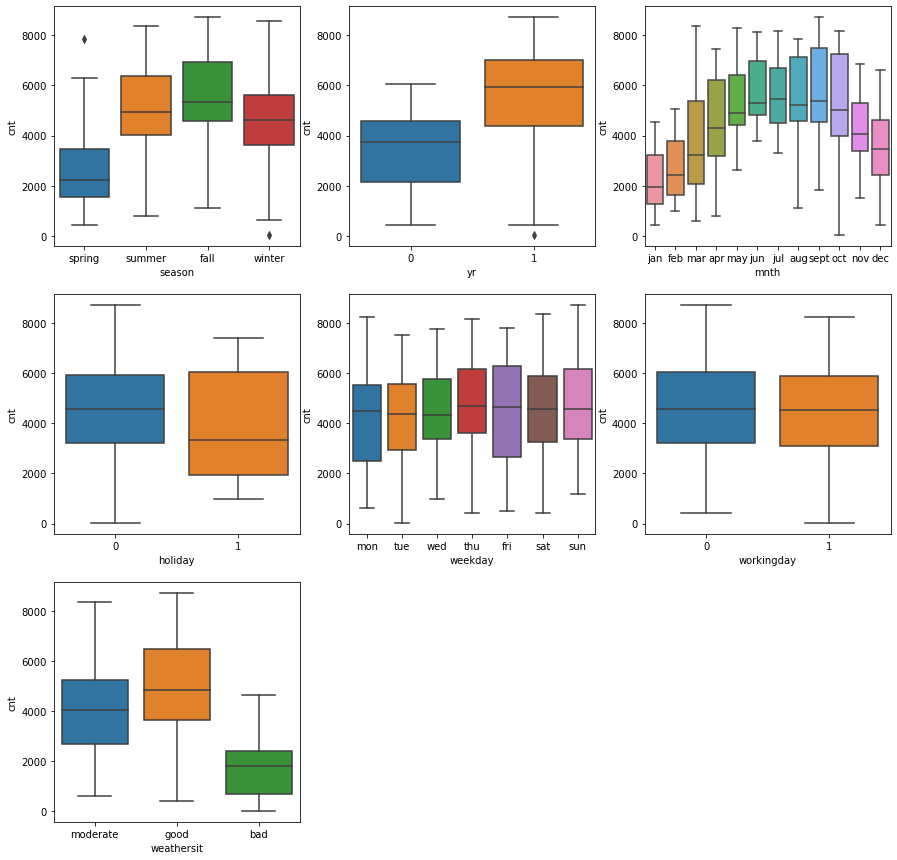

In [16]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes.
    2. I see that demand for the year 2019 has grown.
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is            decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathersit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme 
       weather conditions.

# Model building

In [17]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600


In [19]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

In [20]:
cat=['season','weekday','mnth']
df=pd.get_dummies(df,columns=cat,drop_first='True')
df=pd.get_dummies(df,columns=['weathersit'])

In [21]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [23]:
#dividing dataset into train data and test data
y=df.pop('cnt')
X=df

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [24]:
 # Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(510, 29)
(220, 29)


In [25]:
#Use Normalized scaler to scale
scaler = MinMaxScaler()

# Let us scale continuous variables
num_vars = ['temp','hum','windspeed']

X_train[num_vars]=scaler.fit_transform(X_train[num_vars])

In [26]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_mon,...,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_mon,...,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.243137,0.247059,0.247059,0.154902,...,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.029412,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.429398,0.431725,0.431725,0.362166,...,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### RFE and Automated approach

In [28]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [30]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('mnth_aug', False, 10),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

#### Manual elimination

In [31]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [32]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [33]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [34]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct'],
      dtype='object')

In [35]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [36]:
X_train_rfe.shape

(510, 15)

In [37]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.8
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.67e-188
Time:                        12:55:50   Log-Likelihood:                -4112.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2730.3983    

In [38]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.31e-189
Time:                        12:55:50   Log-Likelihood:                -4112.4
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     495   BIC:                             8318.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2701.5145    

In [39]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          7.87e-187
Time:                        12:55:50   Log-Likelihood:                -4121.8
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     496   BIC:                             8331.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2039.9171    

In [40]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          4.58e-180
Time:                        12:55:51   Log-Likelihood:                -4140.7
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     497   BIC:                             8362.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1545.6135    

In [41]:

cols = ['yr', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          3.71e-180
Time:                        12:55:51   Log-Likelihood:                -4143.2
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     498   BIC:                             8361.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1927.6683    

In [42]:
#final model
cols = ['yr', 'holiday', 'workingday', 'temp',  'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept', 
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          7.71e-181
Time:                        12:55:52   Log-Likelihood:                -4144.4
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     499   BIC:                             8357.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1869.2010    

In [43]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [44]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'holiday', 'workingday', 'temp',  'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept', 
       'weathersit_bad', 'weathersit_moderate']
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1869.2010491681053 [ 2025.94109201 -1012.74572439  -185.70729026  4066.9750904
  -982.92830772   469.07392878  -606.91996458   562.27844561
 -2609.00151066  -693.83344032]


#### Residual Analysis

In [45]:
y_train_pred = lr.predict(X_train[cols])

In [46]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

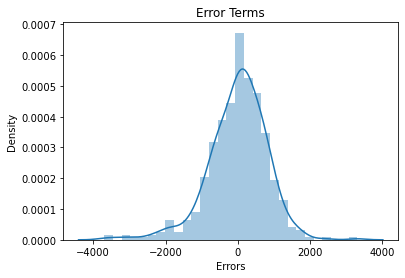

In [47]:
plot_res_dist(y_train, y_train_pred)

Errors are normally distribured here with mean 0

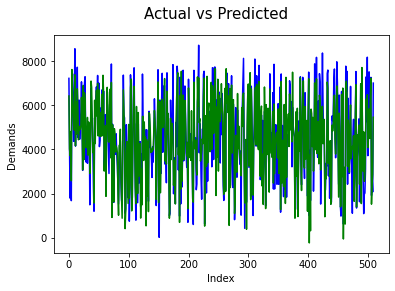

In [48]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and predicted are almost similar

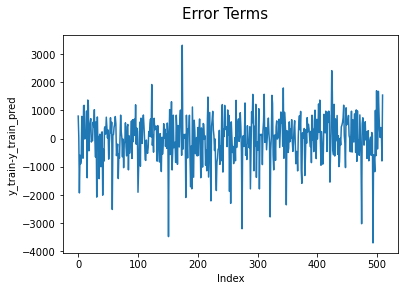

In [49]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Error terms are independent of each other

#### Homoscedasticity

Text(0, 0.5, 'y_test_pred')

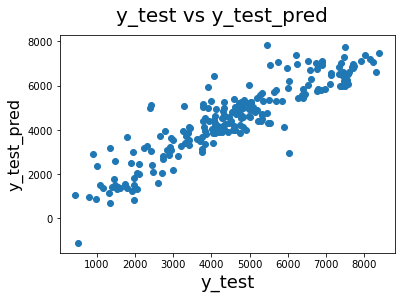

In [54]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

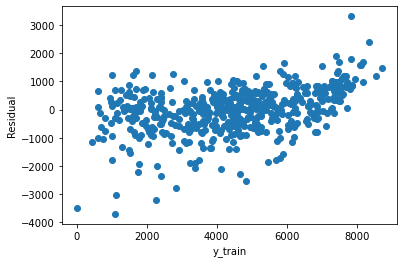

In [57]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.xlabel("y_train")
plt.ylabel("Residual")
plt.show()

#### Predict values for test dataset

In [50]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8236062419476011

In [51]:
#Scale variables in X_test
num_vars = ['temp','hum','windspeed']

#Test data to be transformed only, no fitting

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [52]:
#Columns from our final model
cols = ['yr', 'holiday', 'workingday', 'temp',  'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept', 
       'weathersit_bad', 'weathersit_moderate']
#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [53]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.812349837781625

#### _`Inference`_ 
R2 value for predictions on test data (0.812) is almost same as R2 value of train data(0.823). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

### Final model

In [59]:
cols = ['yr', 'holiday', 'workingday', 'temp',  'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sept', 
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          7.71e-181
Time:                        13:49:25   Log-Likelihood:                -4144.4
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     499   BIC:                             8357.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1869.2010    

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)